#  Concrete Manufacturing - Assignment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import math

In [3]:
Data=pd.read_csv('concrete.csv')
Data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
#Variables
#Cement : measured in kg in a m3 mixture
#Blast : measured in kg in a m3 mixture
#Fly ash : measured in kg in a m3 mixture
#Water : measured in kg in a m3 mixture
#Superplasticizer : measured in kg in a m3 mixture
#Coarse Aggregate : measured in kg in a m3 mixture
#Fine Aggregate : measured in kg in a m3 mixture
#Age : day (1~365)
#Concrete compressive strength measured in MPa

In [5]:
Data.isnull().sum()
#Seems like no null values are present

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
Data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

#  Exploratory Data Analysis

In [66]:
#Analysing inputs
Data_input=Data.drop('strength',axis=1)
Data_input.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [67]:
Data_input.keys()

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

### Visualising individual distributions of the input features

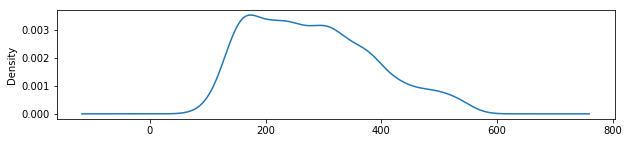

In [73]:
plt.gcf().set_size_inches(10,2)
Data['cement'].plot.density()

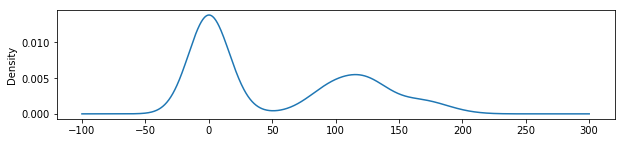

In [74]:
plt.gcf().set_size_inches(10,2)
Data['ash'].plot.density()

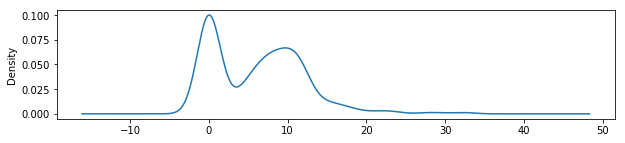

In [75]:
plt.gcf().set_size_inches(10,2)
Data['superplastic'].plot.density()

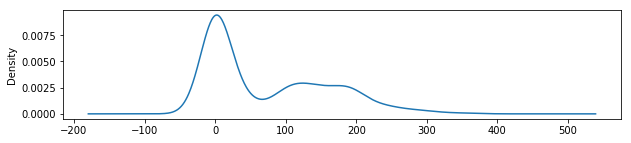

In [77]:
plt.gcf().set_size_inches(10,2)
Data['slag'].plot.density()

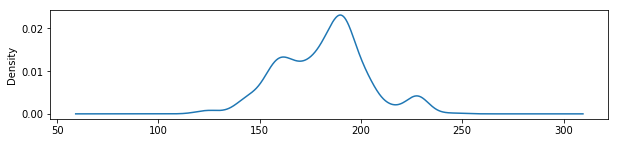

In [78]:
plt.gcf().set_size_inches(10,2)
Data['water'].plot.density()

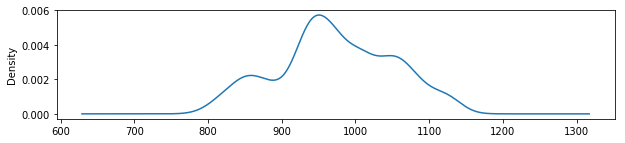

In [79]:
plt.gcf().set_size_inches(10,2)
Data['coarseagg'].plot.density()

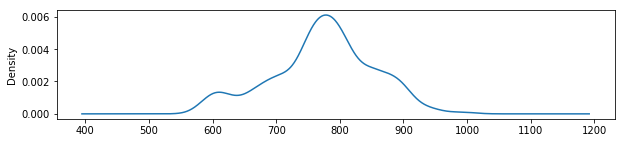

In [80]:
plt.gcf().set_size_inches(10,2)
Data['fineagg'].plot.density()

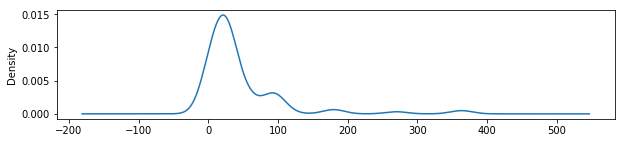

In [82]:
plt.gcf().set_size_inches(10,2)
Data['age'].plot.density()

<Figure size 720x144 with 0 Axes>

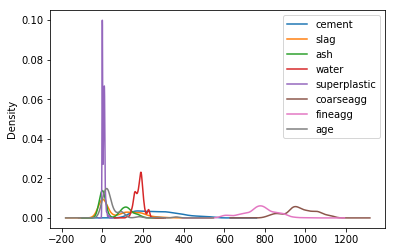

In [81]:
plt.gcf().set_size_inches(10,2)
Data_input.plot.density()

### Distribution of the target variable

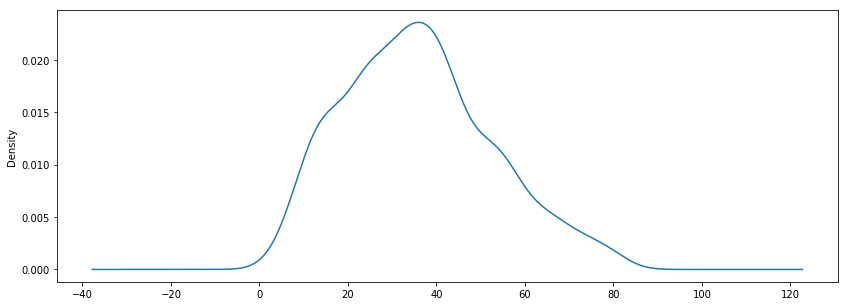

In [84]:
plt.gcf().set_size_inches(14,5)
Data['strength'].plot.density()

## Multivariate Analysis

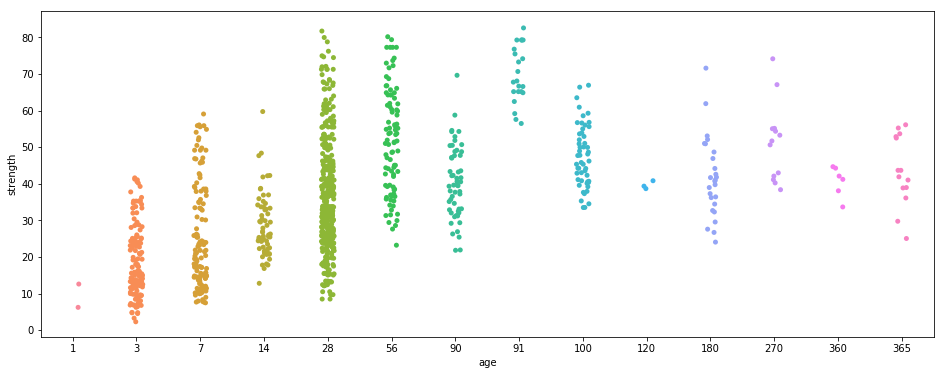

In [9]:
plt.gcf().set_size_inches(16,6)
sns.stripplot(Data_input['age'],Data['strength'])
#Strength appears very high if the age is around 91-91 days
#A weak parabolic (probably quadratic) relation seems to emerge between age and strength

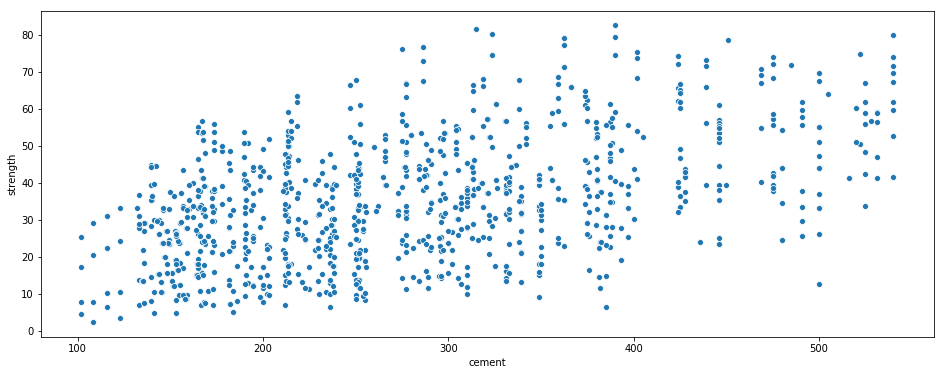

In [10]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data_input['cement'],Data['strength'])
#A weak relationship between the features observed

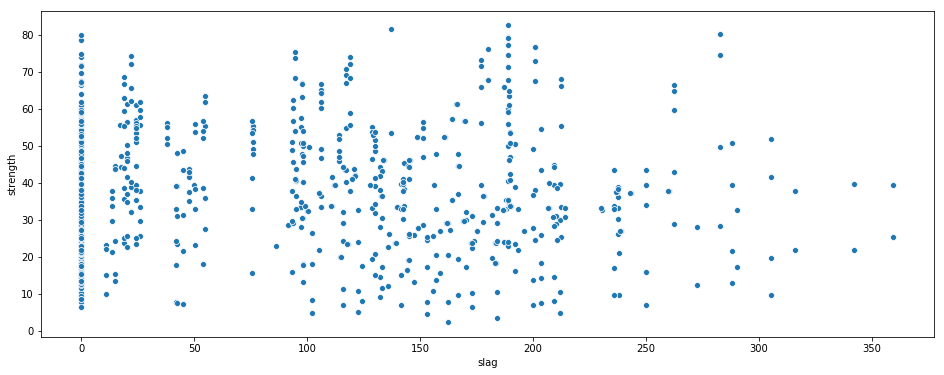

In [11]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data_input['slag'],Data['strength'])

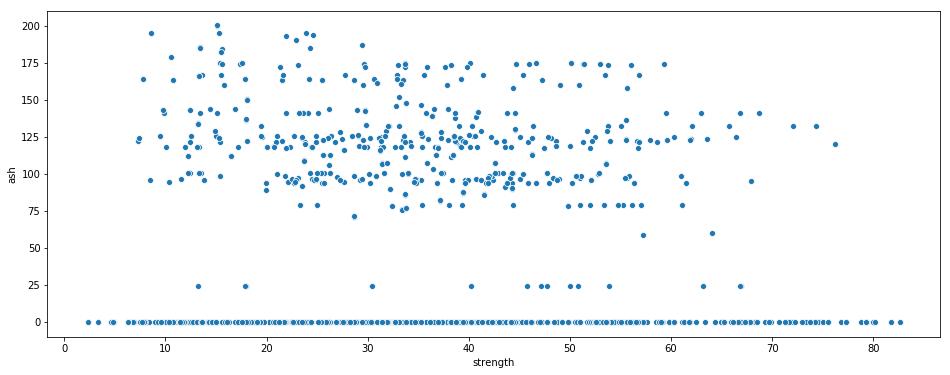

In [12]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data['strength'],Data_input['ash'])   
#Non-linear relationship probably logarithmic

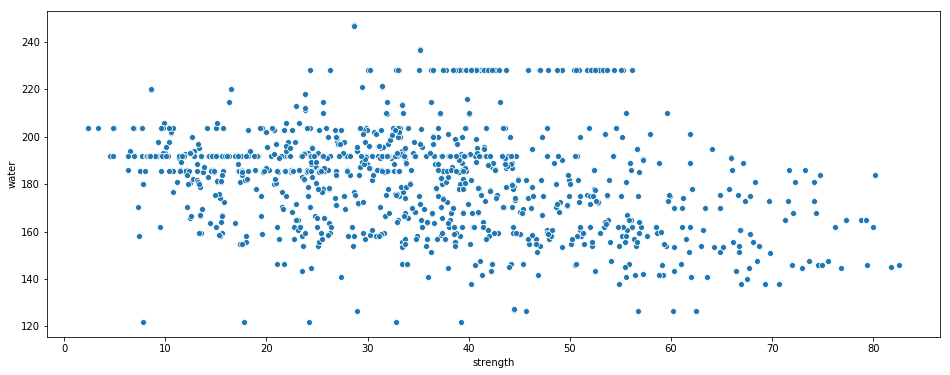

In [13]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data['strength'],Data_input['water'])   
#No apparent relationship

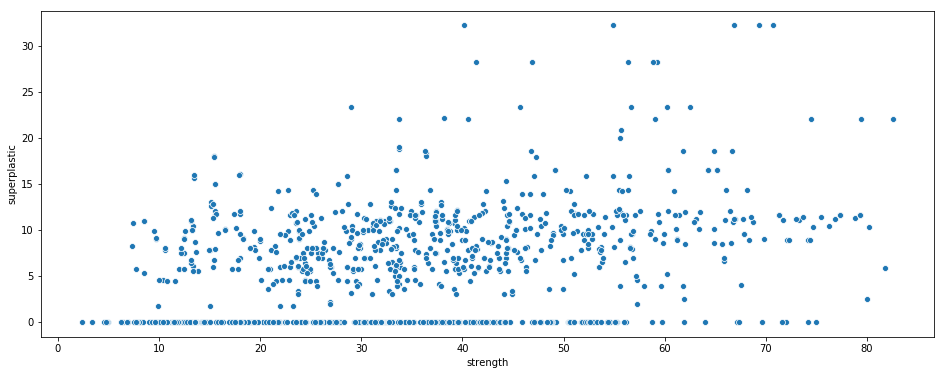

In [14]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data['strength'],Data_input['superplastic'])   
#Non-linear relationship probably logarithmic

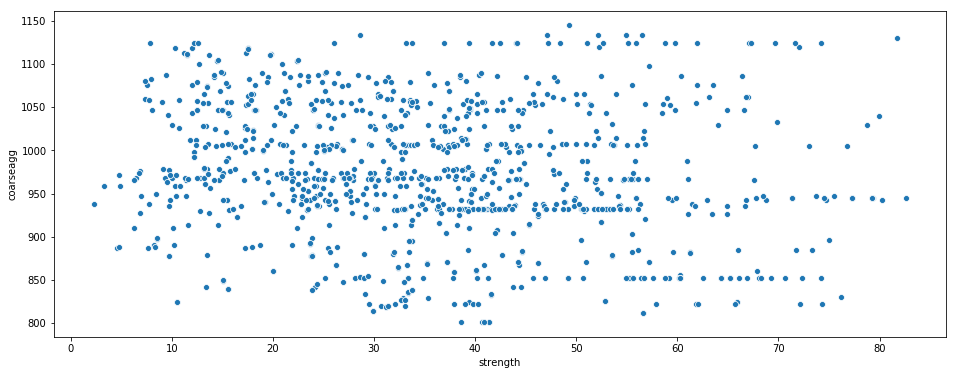

In [15]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data['strength'],Data_input['coarseagg'])   
#No apparent relationship 

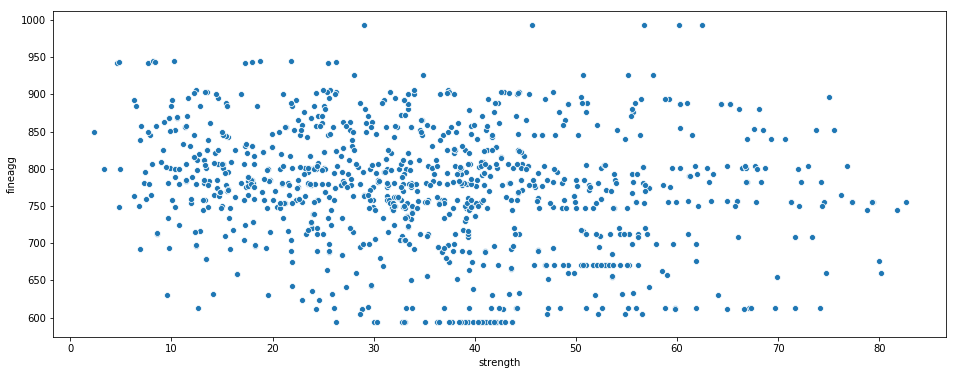

In [16]:
plt.gcf().set_size_inches(16,6)
sns.scatterplot(Data['strength'],Data_input['fineagg'])   
#No apparent relationship

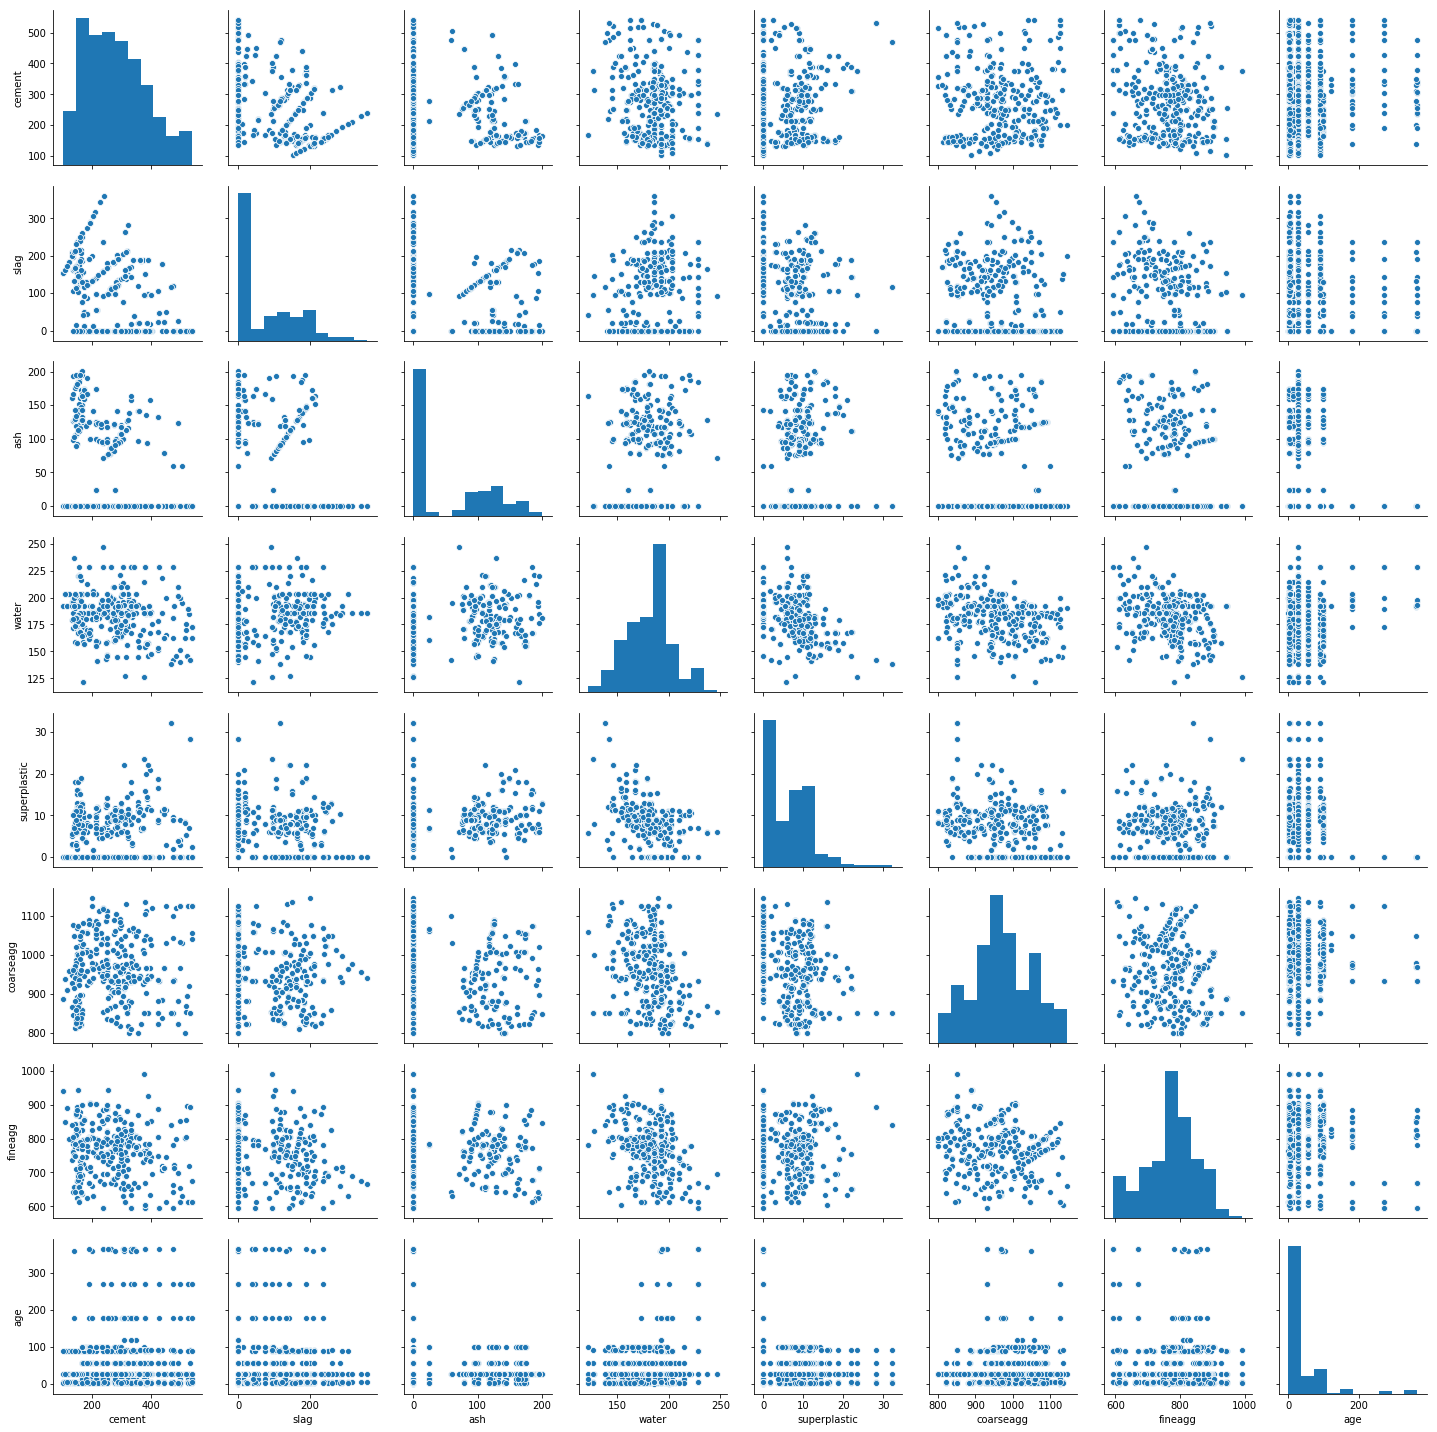

In [17]:
sns.pairplot(Data_input)

In [18]:
Data_input.corr()
# High correlation between superplastic and water (neg)
# Correlation between fineagg and water (neg), superplastic and ash (pos), cement and ash (neg), ash and slag (neg)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000


## Univariate Analysis

In [19]:
Data.describe()
# Age and Slag seem to have outliers. Need to investigate

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


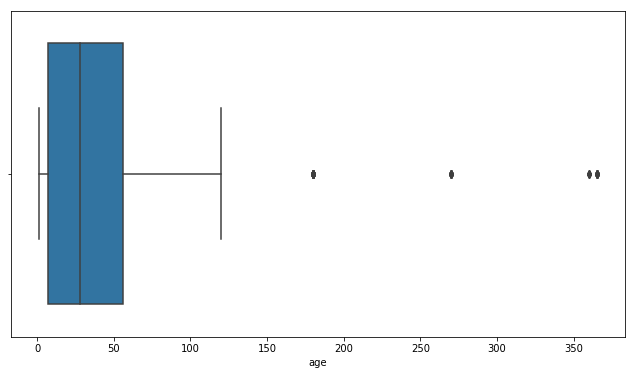

In [20]:
plt.gcf().set_size_inches(11,6)
sns.boxplot(Data['age'])
# Outliers detected

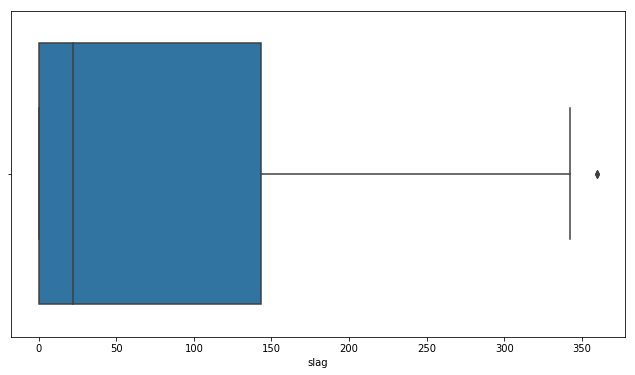

In [21]:
plt.gcf().set_size_inches(11,6)
sns.boxplot(Data['slag'])
#Outlier detected

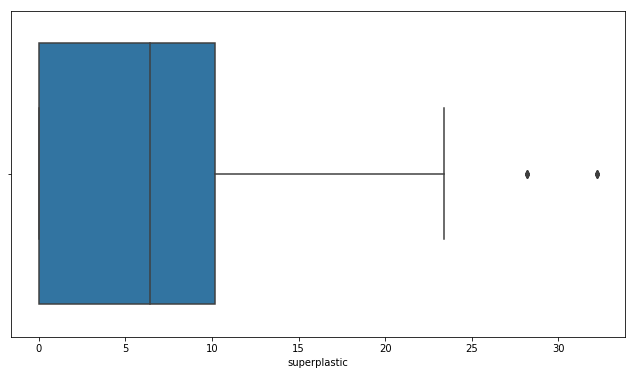

In [22]:
plt.gcf().set_size_inches(11,6)
sns.boxplot(Data['superplastic'])
#Superplastic also has outliers

## Performing scaling to remove outliers as the sample size is too small, and removing samples would harm the training exercise

In [23]:
from scipy.stats import zscore

In [24]:
zscaled_data=Data_input.apply(zscore)
zscaled_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733


In [25]:
zscaled_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-3.858833e-16,9.593189e-18,3.634633e-16,-2.014570e-16,1.103756e-16,7.116206e-16,9.537139e-16,3.794160e-17
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.568879e-01,-8.471439e-01,-2.800211e+00,-1.039143e+00,-2.212138e+00,-2.240917e+00,-7.073594e-01
25%,-8.500535e-01,-8.568879e-01,-8.471439e-01,-7.808939e-01,-1.039143e+00,-5.265174e-01,-5.319697e-01,-6.123314e-01
50%,-7.915193e-02,-6.017783e-01,-8.471439e-01,1.608294e-01,3.271508e-02,-6.329352e-02,7.386739e-02,-2.797331e-01
75%,6.589606e-01,8.007446e-01,1.002278e+00,4.887927e-01,6.691307e-01,7.267605e-01,6.291661e-01,1.637312e-01
max,2.477915e+00,3.310675e+00,2.281084e+00,3.065647e+00,4.353642e+00,2.214224e+00,2.733062e+00,5.057677e+00


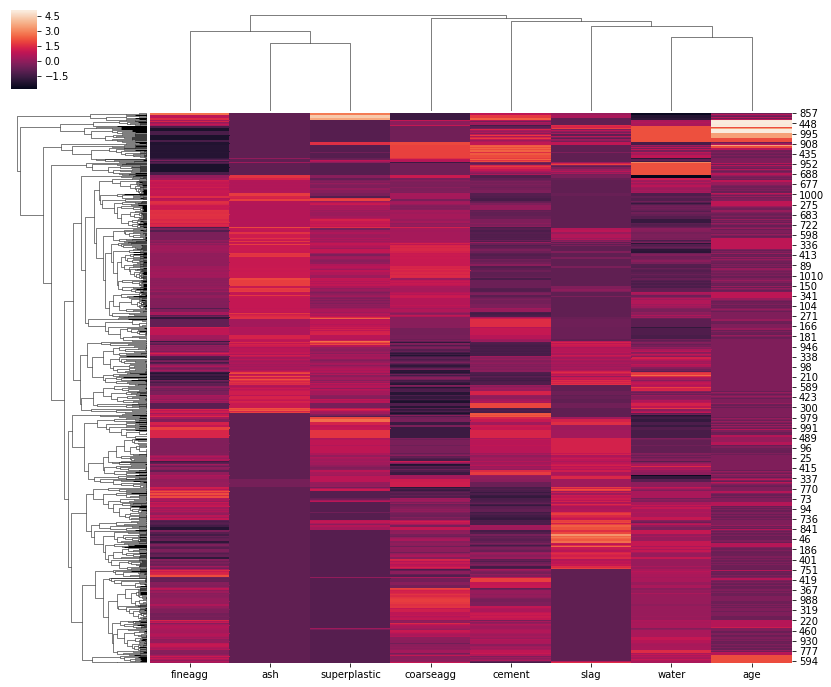

In [26]:
sns.clustermap(zscaled_data,figsize=(14, 12)) 

## Since there seems to be non-linear relationship between mutliple variables, the best model to go ahead with is the Random Forest Regressor

## Random Forest Regressor with full set of features

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = zscaled_data
y= Data['strength']

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25, random_state =7)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
#Initialising Random Forest Regressor Model
rfr=RandomForestRegressor()

In [34]:
#Initialising Hyperparameter grid for Grid Search
param_grid = {
       'max_depth': [1,2,3,4,5,6,7,8],
       'n_estimators':[50,100,150,200]}

In [35]:
#Initialising Grid Search
gridcv=GridSearchCV(rfr, param_grid, cv=10)

In [36]:
#Fitting a model using hyperparameter tuning using GridSearchCV
gridcv.fit(x,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6

In [37]:
#Best parameter setup as chosen by Grid Seach Algorithm
print(gridcv.best_params_)

{'max_depth': 8, 'n_estimators': 200}


In [38]:
#Best model chosen by Grid Search Algorithm
print(gridcv.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [39]:
#Getting ccuracy score for the best model
gridcv.score(x,y)

0.9613265284596741

In [40]:
# Extracting Feature Importance
gridcv.best_estimator_.feature_importances_

array([0.33486965, 0.07983606, 0.01434176, 0.10219874, 0.07144316,
       0.02359736, 0.03193891, 0.34177436])

Text(0.5,0,'Relative Importance')

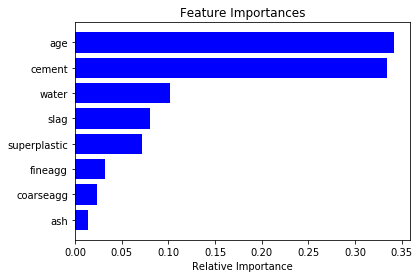

In [41]:
features=Data_input.columns
importances = gridcv.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
# Age and Cement have received highest feature importance

In [42]:
predicted=gridcv.best_estimator_.predict(xtest)

In [85]:
from sklearn.metrics import median_absolute_error
print ("Mean Absolute Error of the Random Forest Regressor is ", median_absolute_error(ytest,predicted))

Mean Absolute Error of the Random Forest Regressor is  1.919742586929555


In [89]:
pred=pd.DataFrame(predicted)

In [90]:
ytest.reset_index(drop = True, inplace=True)
pred.reset_index(drop = True, inplace=True)

In [93]:
pred.columns=['pred']

In [95]:
compare=pd.concat([ytest,pred],axis=1)

In [96]:
compare.head(10)

,strength,pred
0,18.03,21.837232
1,26.91,32.441301
2,53.77,50.154533
3,27.34,31.878910
4,20.73,15.341509
5,41.94,42.403609
6,43.89,44.803502
7,39.94,39.682416
8,28.99,27.969215
9,28.94,29.026663


# Can we do Better by reducing input dimensions?

## Applying Principal Component Analysis: Extracting 3,4, and 5 principal components 

In [44]:
from sklearn.decomposition import PCA

        cement      slag       ash     water  superplastic  coarseagg  \
PC-1  0.098401  0.177262 -0.394662  0.547004     -0.505945   0.037928   
PC-2 -0.113737  0.686053 -0.142948  0.053256      0.282930  -0.629943   
PC-3  0.814202 -0.171794 -0.408221 -0.213190      0.234597  -0.174088   

       fineagg       age  
PC-1 -0.401926  0.291479  
PC-2 -0.019391 -0.125981  
PC-3 -0.004569  0.100521  
Explained variance:  [0.28501242 0.17700935 0.16750988]
Total Variance Explained:  0.6295316493778732


Text(0,0.5,'cumulative explained variance')

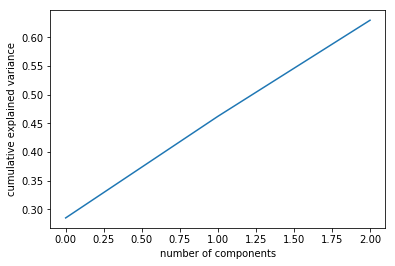

In [45]:
pca = PCA(n_components=3,svd_solver='full')
pca.fit_transform(zscaled_data)

# Print components relations with features:
print (pd.DataFrame(pca.components_,columns=zscaled_data.columns,index = ['PC-1','PC-2','PC-3']))

print("Explained variance: ",pca.explained_variance_ratio_)  
print("Total Variance Explained: ", sum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<BarContainer object of 3 artists>

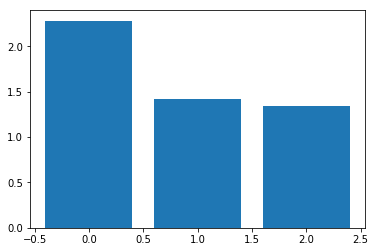

In [46]:
features = range(pca.n_components_)
plt.bar(features[:7], pca.explained_variance_[:7])

        cement      slag       ash     water  superplastic  coarseagg  \
PC-1  0.098401  0.177262 -0.394662  0.547004     -0.505945   0.037928   
PC-2 -0.113737  0.686053 -0.142948  0.053256      0.282930  -0.629943   
PC-3  0.814202 -0.171794 -0.408221 -0.213190      0.234597  -0.174088   
PC-4 -0.054297 -0.362699  0.226751  0.296060     -0.037274  -0.545805   

       fineagg       age  
PC-1 -0.401926  0.291479  
PC-2 -0.019391 -0.125981  
PC-3 -0.004569  0.100521  
PC-4  0.385282  0.527919  
Explained variance:  [0.28501242 0.17700935 0.16750988 0.12676986]
Total Variance Explained:  0.7563015080397697


Text(0,0.5,'cumulative explained variance')

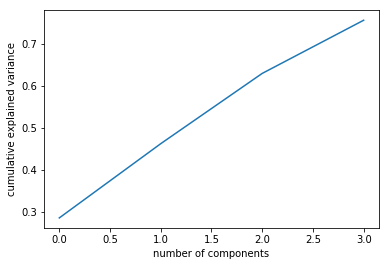

In [47]:
pca1 = PCA(n_components=4,svd_solver='full')
pca1.fit_transform(zscaled_data)

# Print components relations with features:
print (pd.DataFrame(pca1.components_,columns=zscaled_data.columns,index = ['PC-1','PC-2','PC-3','PC-4']))

print("Explained variance: ",pca1.explained_variance_ratio_)  
print("Total Variance Explained: ", sum(pca1.explained_variance_ratio_))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<BarContainer object of 4 artists>

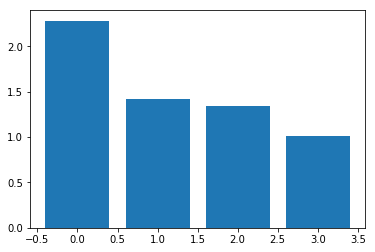

In [48]:
features = range(pca1.n_components_)
plt.bar(features[:7], pca1.explained_variance_[:7])

        cement      slag       ash     water  superplastic  coarseagg  \
PC-1  0.098401  0.177262 -0.394662  0.547004     -0.505945   0.037928   
PC-2 -0.113737  0.686053 -0.142948  0.053256      0.282930  -0.629943   
PC-3  0.814202 -0.171794 -0.408221 -0.213190      0.234597  -0.174088   
PC-4 -0.054297 -0.362699  0.226751  0.296060     -0.037274  -0.545805   
PC-5  0.148206 -0.020932  0.549631  0.070222      0.354618  -0.033083   

       fineagg       age  
PC-1 -0.401926  0.291479  
PC-2 -0.019391 -0.125981  
PC-3 -0.004569  0.100521  
PC-4  0.385282  0.527919  
PC-5 -0.701237  0.228010  
Explained variance:  [0.28501242 0.17700935 0.16750988 0.12676986 0.1189385 ]
Total Variance Explained:  0.8752400072178601


Text(0,0.5,'cumulative explained variance')

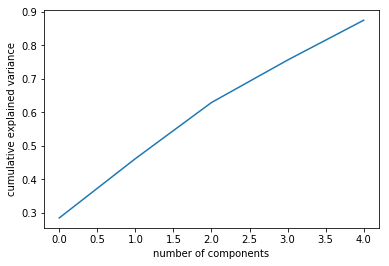

In [49]:
pca2 = PCA(n_components=5,svd_solver='full')
pca2.fit_transform(zscaled_data)

# Print components relations with features:
print (pd.DataFrame(pca2.components_,columns=zscaled_data.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5']))

print("Explained variance: ",pca2.explained_variance_ratio_)  
print("Total Variance Explained: ", sum(pca2.explained_variance_ratio_))
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<BarContainer object of 5 artists>

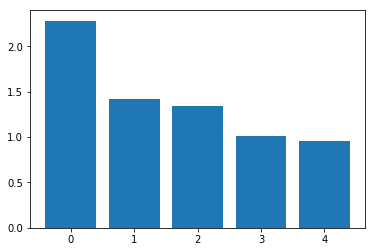

In [50]:
features = range(pca2.n_components_)
plt.bar(features[:7], pca2.explained_variance_[:7])

## 5 Principal Components seems like a decent set to explain the model variance (87.5% variance explained)

## Modelling Random Forest Regressor with Principal Components

In [51]:
#Initialising Random Forest Regressor Model
rfr1=RandomForestRegressor()

In [52]:
#Initialising Hyperparameter grid for Grid Search
# Max depth is limited to 5 since only 5 principal components exist
param_grid = {
       'max_depth': [1,2,3,4,5],
       'n_estimators':[50,100,150,200]}

In [53]:
#Initialising Grid Search
gridcv1=GridSearchCV(rfr1, param_grid, cv=10)

In [54]:
x_train_pca = pca.transform(xtrain)
x_test_pca = pca.transform(xtest)

In [55]:
#Fitting a model using hyperparameter tuning using GridSearchCV
gridcv1.fit(x_train_pca,ytrain)

C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5],


In [56]:
gridcv1.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [57]:
gridcv1.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
gridcv1.score(x_test_pca,ytest)

0.5092879650702047

In [59]:
predicted1=gridcv1.best_estimator_.predict(x_test_pca)

In [60]:
print("Mean Absolute Error of the Random Forest Regressor is: ", median_absolute_error(ytest, predicted1))

Mean Absolute Error of the Random Forest Regressor is:  7.5203772711334125


# The random forest regressor on the original feature set (without performing PCA on it) yielded a better model fit and accuracy. Hence going ahead with it.